In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [23]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/BAJFINANCE.csv")

In [24]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [25]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5235 non-null   object 
 1   Symbol              5235 non-null   object 
 2   Series              5235 non-null   object 
 3   Prev Close          5235 non-null   float64
 4   Open                5235 non-null   float64
 5   High                5235 non-null   float64
 6   Low                 5235 non-null   float64
 7   Last                5235 non-null   float64
 8   Close               5235 non-null   float64
 9   VWAP                5235 non-null   float64
 10  Volume              5235 non-null   int64  
 11  Turnover            5235 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4789 non-null   float64
 14  %Deliverble         4789 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 613.6

In [26]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5.235000e+03,5.235000e+03,2456.000000,4.789000e+03,4789.000000
mean,1414.245559,1415.326342,1439.089064,1390.673553,1415.299513,1415.278023,1415.529375,6.116085e+05,1.789601e+14,56423.101384,1.611350e+05,0.627860
std,1849.696349,1850.060652,1878.002596,1820.721455,1850.458617,1850.441324,1850.061771,1.897438e+06,5.754942e+14,106039.666275,3.752887e+05,0.244709
min,24.500000,25.200000,25.200000,24.500000,24.500000,24.500000,25.200000,3.000000e+00,1.047000e+07,21.000000,6.000000e+00,0.057500
25%,118.875000,120.000000,123.875000,116.025000,119.000000,119.450000,120.560000,4.899000e+03,7.308218e+10,1682.000000,4.951000e+03,0.450600
50%,610.950000,606.300000,624.000000,598.100000,611.000000,611.000000,611.040000,1.687000e+04,9.145276e+11,13717.500000,1.489000e+04,0.669800
75%,1922.000000,1925.425000,1949.425000,1900.000000,1924.425000,1923.575000,1920.975000,1.191885e+05,3.981237e+13,59527.500000,1.169190e+05,0.828400
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,979111.000000,6.952047e+06,1.000000


In [27]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [28]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [29]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [30]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [31]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [32]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [33]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
5230,2.963753,0.992537,4736.55,2903989,NaN
5231,3.019035,2.486834,4865.05,2644997,NaN
5232,8.036623,7.444557,5280.90,8576454,NaN
5233,3.658537,2.520561,5484.85,7258486,NaN
5234,3.696717,1.904673,5451.90,4124888,NaN


In [34]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [35]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [36]:
#Define the prediction model
model = RandomForestRegressor()

In [37]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.9784859559623632


In [39]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [40]:
predictions = model.predict(X_Check)

In [41]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

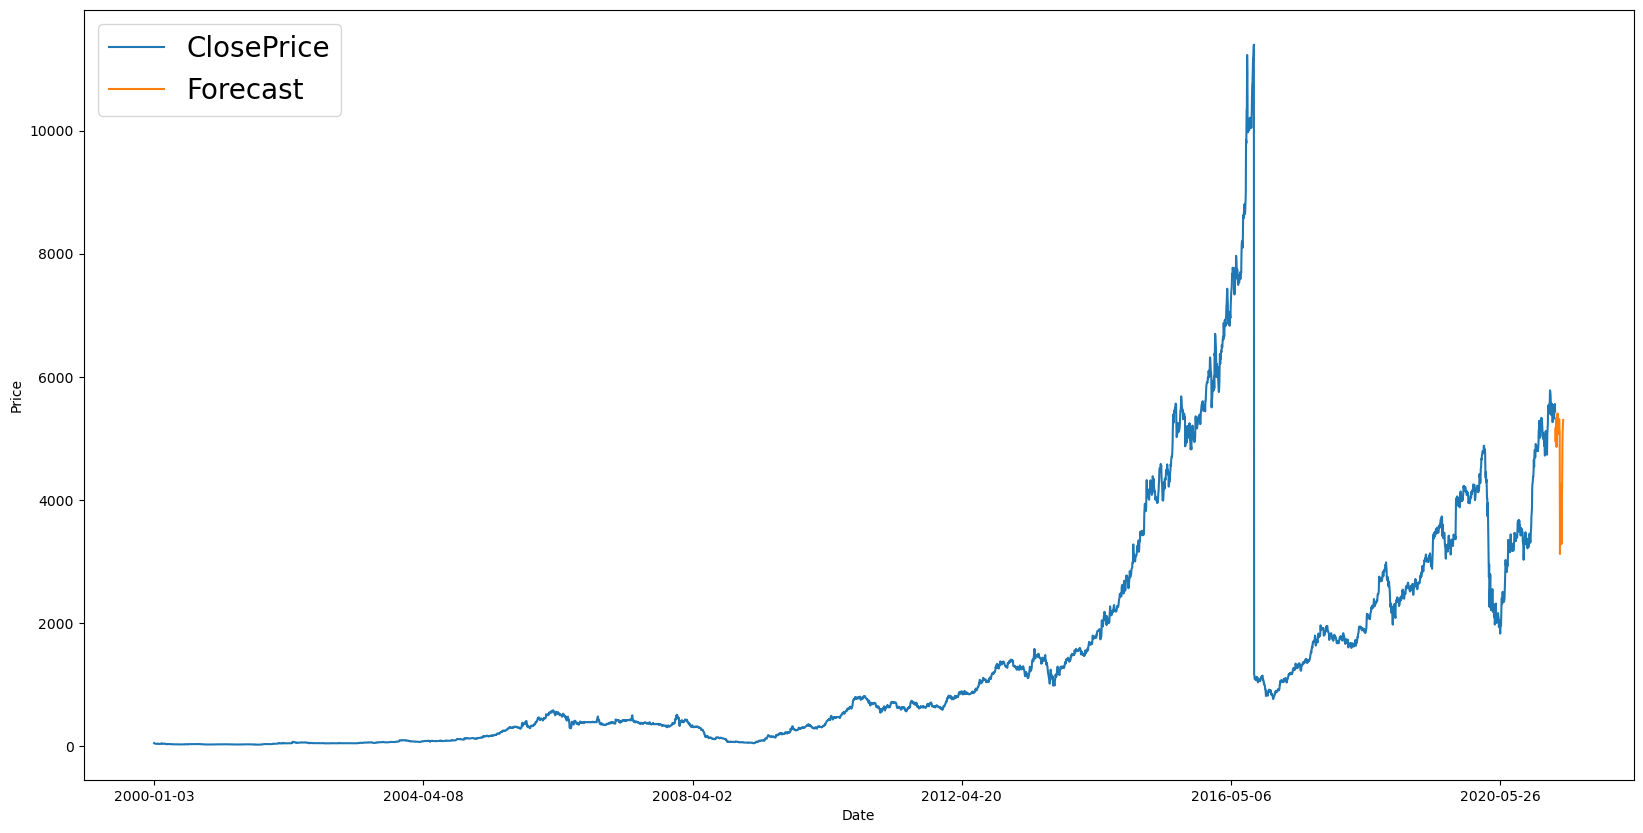

In [42]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')